<h1><center>Machine Learning Twitter Sentiment data Analysis - (CSC8635) </center></h1>
<h3><center>Akash Mohandoss - (220488118)</center></h3>

In [1]:
#Importing the required libraries
import re
import string
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn import svm
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Loading the datasets
Train_data = pd.read_csv (r'C:\Users\Akash\OneDrive\Desktop\Twitter Analysis\Tweets_train.csv')
Test_data  = pd.read_csv (r'C:\Users\Akash\OneDrive\Desktop\Twitter Analysis\New_Tweets_test.csv')
Valid_data = pd.read_csv (r'C:\Users\Akash\OneDrive\Desktop\Twitter Analysis\Tweets_dev.csv')

<h2>Exploratory Data Analysis</h2>

In [3]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB


In [4]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1464 non-null   int64 
 1   tweet_id           1464 non-null   int64 
 2   text               1464 non-null   object
 3   airline_sentiment  1464 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.9+ KB


In [5]:
Valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [6]:
#Train data description
Train_data.describe(include='all')

,tweet_id,text,airline_sentiment
count,1.185800e+04,11858,11858
unique,NaN,11713,3
top,NaN,@united thanks,negative
freq,NaN,6,7434
mean,5.692188e+17,NaN,NaN
std,7.804861e+14,NaN,NaN
min,5.675883e+17,NaN,NaN
25%,5.685585e+17,NaN,NaN
50%,5.694839e+17,NaN,NaN
75%,5.698913e+17,NaN,NaN


In [7]:
#Test data description
Test_data.describe(include='all')

,Unnamed: 0,tweet_id,text,airline_sentiment
count,1464.00000,1.464000e+03,1464,1464
unique,NaN,NaN,1454,3
top,NaN,NaN,@AmericanAir thanks,negative
freq,NaN,NaN,3,918
mean,731.50000,5.692184e+17,NaN,NaN
std,422.76471,7.770030e+14,NaN,NaN
min,0.00000,5.676550e+17,NaN,NaN
25%,365.75000,5.685620e+17,NaN,NaN
50%,731.50000,5.694595e+17,NaN,NaN
75%,1097.25000,5.698950e+17,NaN,NaN


In [8]:
Train_data.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [9]:
Train_data.tail()

,tweet_id,text,airline_sentiment
11853,570123872168574976,"@AmericanAir will not help us on the phone, at...",negative
11854,570063683256242177,@USAirways has the worst customer service line...,negative
11855,568032524749942784,@USAirways grades for this trip:\n\nFlight tim...,negative
11856,569705813142409217,@united Thanks for the vague canned response t...,negative
11857,569976114124349440,@united already did that at the airport and 12...,negative


In [10]:
Test_data.head()

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,570252000000000000,@AmericanAir I need refund.,negative
1,1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative
2,2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive
3,3,569503000000000000,@united I have never been more frustrated than...,negative
4,4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative


In [11]:
Test_data.tail()

,Unnamed: 0,tweet_id,text,airline_sentiment
1459,1459,569678000000000000,@AmericanAir I didn't miss my flight. America...,negative
1460,1460,569882000000000000,@USAirways here's to sitting on hold for 4 hrs...,negative
1461,1461,568192000000000000,@SouthwestAir just had a great flight #4223 wi...,positive
1462,1462,569775000000000000,@AmericanAir Why did AA973 return to JFK? Tha...,neutral
1463,1463,569941000000000000,@AmericanAir How can I get a flight change whi...,negative


In [12]:
#Checking Null values count in Train Data
Train_data.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [13]:
#Checking Null values count in Test Data
Test_data.isnull().sum()

Unnamed: 0           0
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [14]:
#Checking Null values count in Validation Data
Valid_data.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [15]:
#Dropping the duplicates if any
Train_data['text'].drop_duplicates(inplace = True)
Test_data['text'].drop_duplicates(inplace = True)

In [16]:
#Dropping the Tweet_id
Train_data=Train_data.drop(['tweet_id'],axis=1)
Test_data=Test_data.drop(["tweet_id"],axis=1)
Valid_data=Valid_data.drop(["tweet_id"],axis=1)

[Text(0.5, 1.0, 'Train Data')]

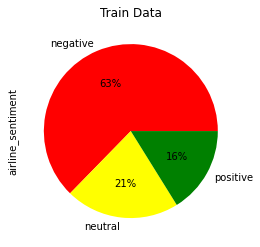

In [17]:
#Displaying Pie chart for Train data sentiment review count
Train_data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%', colors=["red","yellow","green"]).set(title='Train Data')

[Text(0.5, 1.0, 'Test Data')]

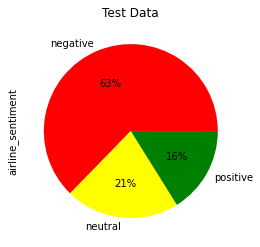

In [18]:
#Displaying Pie chart for Test data sentiment review count
Test_data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%', colors=["red","yellow","green"]).set(title='Test Data')

[Text(0.5, 1.0, 'Train Data')]

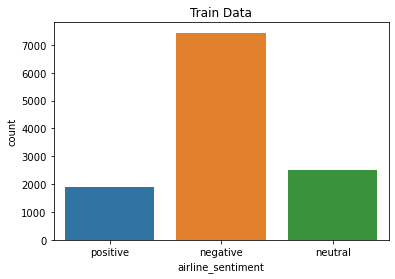

In [19]:
sns.countplot(x= 'airline_sentiment',data = Train_data).set(title='Train Data')

[Text(0.5, 1.0, 'Test Data')]

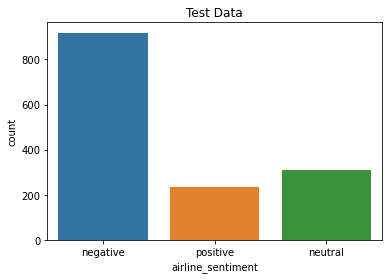

In [20]:
sns.countplot(x= 'airline_sentiment',data = Test_data).set(title='Test Data')

In [21]:
#Displaying the count of each review of Train data
Train_data_sentimentCount = Train_data.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
Train_data_sentimentCount.style.background_gradient(cmap='Greens', low=2, high=4)

,airline_sentiment,text
0,negative,7434
1,neutral,2510
2,positive,1914


In [22]:
#Displaying the count of each review of Test data
Test_data_sentimentCount = Test_data.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
Test_data_sentimentCount.style.background_gradient(cmap='Greens', low=2, high=4)

,airline_sentiment,text
0,negative,918
1,neutral,310
2,positive,236


In [23]:
#Displaying the count of each review of validation data
Valid_data_sentimentCount = Valid_data.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
Valid_data_sentimentCount.style.background_gradient(cmap='Greens', low=2, high=4)

,airline_sentiment,text
0,negative,826
1,neutral,279
2,positive,213


In [24]:
#Converting the String values Positive, Negative, and Neutral into integer as 0, 1, 2 respectively.
Test_data["airline_sentiment"] = pd.Categorical(Test_data["airline_sentiment"]).codes
Valid_data["airline_sentiment"] = pd.Categorical(Valid_data["airline_sentiment"]).codes
Train_data["airline_sentiment"] = pd.Categorical(Train_data["airline_sentiment"]).codes


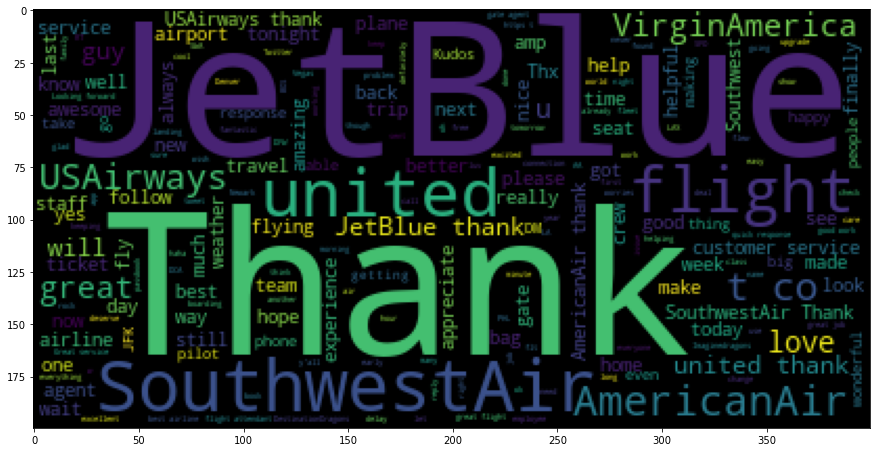

In [25]:
##Displaying WordCloud for Train data positive tweets
positive_tweets = Train_data[Train_data['airline_sentiment'] == 2]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

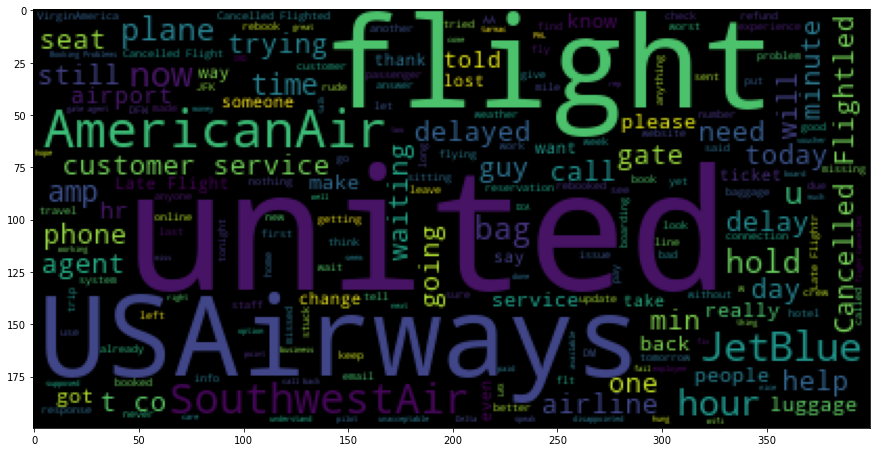

In [26]:
##Displaying WordCloud for Train data Negative tweets
negative_tweets = Train_data[Train_data['airline_sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

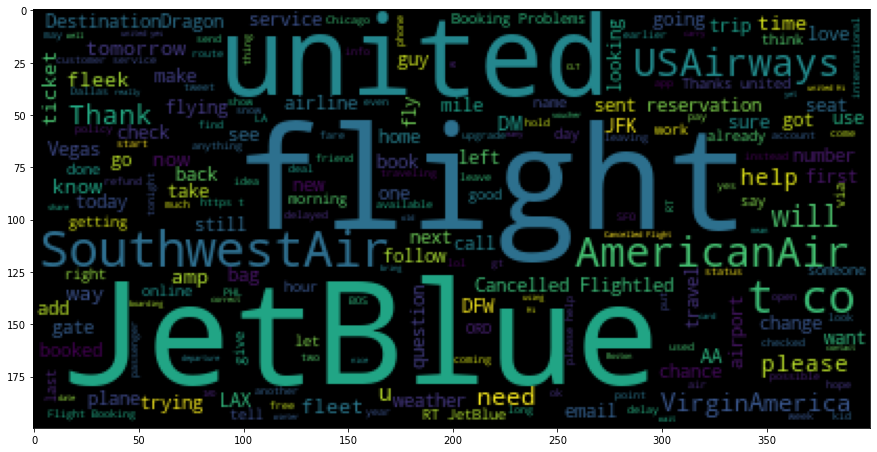

In [27]:
#Displaying WordCloud for Train data Neutral tweets
Neutral_tweets = Train_data[Train_data['airline_sentiment'] == 1]['text'].tolist()
Neutral_tweets_string = " ".join(Neutral_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(Neutral_tweets_string))

<h2>Data Pre-processing</h2>

In [28]:
#Preprocessing ['removing the twitter handles']
Train_data['text'] = Train_data['text'].apply(lambda x : ' '.join([w for w in x.split() if not w.startswith('@') ])  ) 
Test_data['text'] = Test_data['text'].apply(lambda x : ' '.join([w for w in x.split() if not w.startswith('@') ])  ) 
Valid_data['text'] = Valid_data['text'].apply(lambda x : ' '.join([w for w in x.split() if not w.startswith('@') ])  ) 

Train_data

,text,airline_sentiment
0,you're good. Thank you!,2
1,"way to ruin a vacation, my brother has called ...",0
2,yes thankfully! Catering just got here and now...,2
3,The automated message isn't helpful and it's i...,0
4,I'm #MakingLoveOutofNothingAtAll on my #brandl...,2
...,...,...
11853,"will not help us on the phone, at the gate or ...",0
11854,has the worst customer service line. I've call...,0
11855,grades for this trip: Flight timeliness: 👎✈️ C...,0
11856,Thanks for the vague canned response that does...,0


In [29]:
#removing the punctuations from the data 
Train_data['text'] = [i for i in Train_data['text'] if i not in stopwords.words('english') and i not in ['.',',','/','@','"','&amp','<br />','+/-','zzzzzzzzzzzzzzzzz',':-D',':D',':P',':)','!',';']]
Test_data['text'] = [i for i in Test_data['text'] if i not in stopwords.words('english') and i not in ['.',',','/','@','"','&amp','<br />','+/-','zzzzzzzzzzzzzzzzz',':-D',':D',':P',':)','!',';']]
Valid_data['text'] = [i for i in Valid_data['text'] if i not in stopwords.words('english') and i not in ['.',',','/','@','"','&amp','<br />','+/-','zzzzzzzzzzzzzzzzz',':-D',':D',':P',':)','!',';']]

In [30]:
#Removing URL and website links in the data
Train_data['text'] = Train_data['text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
Train_data['text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

Test_data['text'] = Test_data['text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
Test_data['text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

Valid_data['text'] = Valid_data['text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
Valid_data['text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0       Great job celebrating #MardiGras2015 . You own...
1       thanks for taking it up a notch!! leinenkugels...
2       Being put back on hold for what has now been a...
3            Thank you for your offer! All sorted out :-)
4       wondering if it's possible for my colleague an...
                              ...                        
1313    "sorry you were disappointed" #outoftouchwithr...
1314    were stuck on a plane in Dallas that's suppose...
1315    Lost my wallet on flight 1007 yesterday from H...
1316    Travelling from pwm to atl on Sunday That flig...
1317                                         thank you :)
Name: text, Length: 1318, dtype: object

In [31]:
#Tokenization
Train_data_lines=list()
Test_data_lines=list()
Train_lines=Train_data['text'].values.tolist()
Test_lines=Test_data['text'].values.tolist()
Valid_data_lines=list()
Valid_lines=Valid_data['text'].values.tolist()
for l in Train_lines:
    tokens=word_tokenize(l)
    tokens=[w.lower() for w in tokens]
    table=str.maketrans('','', string.punctuation)
    stripped=[w.translate(table) for w in tokens]
    words=[word for word in stripped if word.isalpha()]
    Train_data_lines.append(words)
for l in Test_lines:
    tokens=word_tokenize(l)
    tokens=[w.lower() for w in tokens]
    table=str.maketrans('','', string.punctuation)
    stripped=[w.translate(table) for w in tokens]
    words=[word for word in stripped if word.isalpha()]
    Test_data_lines.append(words)
for l in Valid_lines:
    tokens=word_tokenize(l)
    tokens=[w.lower() for w in tokens]
    table=str.maketrans('','', string.punctuation)
    stripped=[w.translate(table) for w in tokens]
    words=[word for word in stripped if word.isalpha()]
    Valid_data_lines.append(words)
Train_data['Tokenized']=Train_data_lines
Test_data['Tokenized']=Test_data_lines
Valid_data['Tokenized']=Valid_data_lines
Valid_data

,text,airline_sentiment,Tokenized
0,Great job celebrating #MardiGras2015 . You own...,2,"[great, job, celebrating, you, own, the, indus..."
1,thanks for taking it up a notch!! leinenkugels...,2,"[thanks, for, taking, it, up, a, notch, leinen..."
2,Being put back on hold for what has now been a...,0,"[being, put, back, on, hold, for, what, has, n..."
3,Thank you for your offer! All sorted out :-),2,"[thank, you, for, your, offer, all, sorted, out]"
4,wondering if it's possible for my colleague an...,1,"[wondering, if, it, s, possible, for, my, coll..."
...,...,...,...
1313,"""sorry you were disappointed"" #outoftouchwithr...",0,"[sorry, you, were, disappointed, outoftouchwit..."
1314,were stuck on a plane in Dallas that's suppose...,0,"[were, stuck, on, a, plane, in, dallas, that, ..."
1315,Lost my wallet on flight 1007 yesterday from H...,0,"[lost, my, wallet, on, flight, yesterday, from..."
1316,Travelling from pwm to atl on Sunday That flig...,0,"[travelling, from, pwm, to, atl, on, sunday, t..."


In [32]:
#Displaying the transformed data
Train_data

,text,airline_sentiment,Tokenized
0,you're good. Thank you!,2,"[you, re, good, thank, you]"
1,"way to ruin a vacation, my brother has called ...",0,"[way, to, ruin, a, vacation, my, brother, has,..."
2,yes thankfully! Catering just got here and now...,2,"[yes, thankfully, catering, just, got, here, a..."
3,The automated message isn't helpful and it's i...,0,"[the, automated, message, is, nt, helpful, and..."
4,I'm #MakingLoveOutofNothingAtAll on my #brandl...,2,"[i, m, makingloveoutofnothingatall, on, my, br..."
...,...,...,...
11853,"will not help us on the phone, at the gate or ...",0,"[will, not, help, us, on, the, phone, at, the,..."
11854,has the worst customer service line. I've call...,0,"[has, the, worst, customer, service, line, i, ..."
11855,grades for this trip: Flight timeliness: 👎✈️ C...,0,"[grades, for, this, trip, flight, timeliness, ..."
11856,Thanks for the vague canned response that does...,0,"[thanks, for, the, vague, canned, response, th..."


In [33]:
#removing stopping words
count = 0  
Train_data['text-filtered'] = ""
for i in Train_data['Tokenized']:
    filtered_sentence = [w for w in i if not w in stop_words]
    Train_data['text-filtered'][count] = filtered_sentence
    count += 1

#removing stopping words for test data
count1 = 0    
Test_data['text-filtered'] = ""
for i in Test_data['Tokenized']:
    filtered_sentence_tst = [w for w in i if not w in stop_words]
    Test_data['text-filtered'][count1] = filtered_sentence_tst
    count1 += 1

count2 = 0    
Valid_data['text-filtered'] = ""
for i in Valid_data['Tokenized']:
    filtered_sentence_tst1 = [w for w in i if not w in stop_words]
    Valid_data['text-filtered'][count2] = filtered_sentence_tst1
    count2 += 1


In [34]:
#Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
Train_data['text-filtered'] = Train_data['text-filtered'].apply(lambda x: stemming(x))
Test_data['text-filtered'] = Test_data['text-filtered'].apply(lambda x: stemming(x))
Valid_data['text-filtered'] = Valid_data['text-filtered'].apply(lambda x: stemming(x))


Train_data['tokens'] = Train_data['text-filtered'].str.join(' ')
Test_data['tokens'] = Test_data['text-filtered'].str.join(' ')
Valid_data['tokens'] = Valid_data['text-filtered'].str.join(' ')

Valid_data.head()

,text,airline_sentiment,Tokenized,text-filtered,tokens
0,Great job celebrating #MardiGras2015 . You own...,2,"[great, job, celebrating, you, own, the, indus...","[great, job, celebrating, industry, another, r...",great job celebrating industry another reason ...
1,thanks for taking it up a notch!! leinenkugels...,2,"[thanks, for, taking, it, up, a, notch, leinen...","[thanks, taking, notch, leinenkugels, craftbee...",thanks taking notch leinenkugels craftbeer goo...
2,Being put back on hold for what has now been a...,0,"[being, put, back, on, hold, for, what, has, n...","[put, back, hold, hour, completely, unacceptable]",put back hold hour completely unacceptable
3,Thank you for your offer! All sorted out :-),2,"[thank, you, for, your, offer, all, sorted, out]","[thank, offer, sorted]",thank offer sorted
4,wondering if it's possible for my colleague an...,1,"[wondering, if, it, s, possible, for, my, coll...","[wondering, possible, colleague, get, earlier,...",wondering possible colleague get earlier fligh...


In [35]:
#Vectorizing the data
vectoriser = TfidfVectorizer()
#x_train = df_train.protext

vectoriser.fit(Train_data['tokens'])
X_train = vectoriser.transform(Train_data['tokens'])
X_test = vectoriser.transform(Test_data['tokens'])
X_val = vectoriser.transform(Valid_data['tokens'])

y_train = Train_data["airline_sentiment"]

#tst_vector = get_feature_vector(np.array(Test_data.iloc[:, 0]))
#X_test = tst_vector.transform(np.array(Test_data.iloc[:, 0]))
y_test = Test_data["airline_sentiment"]

#vf_vector = get_feature_vector(np.array(Valid_data.iloc[:, 0]))
#X_val = vf_vector.transform(np.array(Valid_data.iloc[:, 0]))
y_val = Valid_data["airline_sentiment"]

In [36]:
print(X_train)

  (0, 9048)	0.6526164887389394
  (0, 3847)	0.7576884047060888
  (1, 9944)	0.20045669358508264
  (1, 9740)	0.25961517119175653
  (1, 7775)	0.40320463723989963
  (1, 6738)	0.345506670376435
  (1, 6020)	0.23314513725314726
  (1, 5851)	0.296450713121123
  (1, 5189)	0.2275875225913823
  (1, 3748)	0.14315931003848786
  (1, 2254)	0.33621937210082026
  (1, 1300)	0.23641828665154188
  (1, 1296)	0.18331619058459728
  (1, 1161)	0.3252996965528553
  (1, 705)	0.18135601317236472
  (1, 207)	0.2338505827064119
  (2, 10308)	0.28841743854837854
  (2, 9051)	0.47043395322580556
  (2, 8803)	0.33816604989527566
  (2, 5236)	0.4790312616521339
  (2, 3866)	0.24766558994659504
  (2, 3634)	0.35061123622948
  (2, 1397)	0.4091620295650179
  (3, 8470)	0.29939291295301135
  (3, 7667)	0.25532570891185113
  :	:
  (11855, 3408)	0.40523440889164936
  (11855, 3406)	0.25676310998612656
  (11855, 2154)	0.20664234554028996
  (11855, 1319)	0.19118857629127065
  (11855, 607)	0.34085470365028714
  (11856, 9745)	0.569772220858

<h2>Data Analysis</h2>

In [37]:
# ML Libraries

#Applying the Naive Bayes Model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
y_predict_val = NB_model.predict(X_val)

print("Test data ")

print('Confusion Matrix:\n',confusion_matrix(y_predict_nb, y_test))
print('\nReport:\n',classification_report(y_val,y_predict_val))

T_Report = classification_report(y_val,y_predict_val, output_dict=True)
V_Report = classification_report(y_val,y_predict_val, output_dict=True)


print("Test Accuracy:",T_Report['accuracy'])
print("\n\nValidation data ")

print('Confusion Matrix:\n',confusion_matrix(y_predict_val, y_val))
print('\nReport:\n',classification_report(y_val,y_predict_val))
print("\nValidation Accuracy:", V_Report['accuracy'])


# precision tp / (tp + fp)


Test data 
Confusion Matrix:
 [[913 254 173]
 [  4  49   7]
 [  1   7  56]]

Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       826
           1       0.76      0.11      0.20       279
           2       0.87      0.22      0.35       213

    accuracy                           0.68      1318
   macro avg       0.77      0.44      0.45      1318
weighted avg       0.72      0.68      0.60      1318

Test Accuracy: 0.6836115326251897


Validation data 
Confusion Matrix:
 [[822 241 159]
 [  3  32   7]
 [  1   6  47]]

Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       826
           1       0.76      0.11      0.20       279
           2       0.87      0.22      0.35       213

    accuracy                           0.68      1318
   macro avg       0.77      0.44      0.45      1318
weighted avg       0.72      0.68      0.60      1318


Validation Accuracy: 0.

In [38]:
#Applying Linear SVM Model

# Perform classification with SVM, kernel=linear
classifier_linear = LinearSVC()
classifier_linear.fit(X_train, y_train)
prediction_linear = classifier_linear.predict(X_test)
prediction_linear_valid = classifier_linear.predict(X_val)

#print(accuracy_score(y_test, prediction_linear))
report = classification_report(y_test, prediction_linear, output_dict=True)

print("Test data Accuracy:\t",report['accuracy'])
print('Report:\n')
print(classification_report(y_test,prediction_linear))
report1 = classification_report(y_val, prediction_linear_valid, output_dict=True)
print("Validation data Accuracy:\t",report1['accuracy'])
print('Report:\n')
print(classification_report(y_val,prediction_linear_valid))

Test data Accuracy:	 0.7834699453551912
Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       918
           1       0.62      0.52      0.57       310
           2       0.71      0.64      0.67       236

    accuracy                           0.78      1464
   macro avg       0.73      0.69      0.71      1464
weighted avg       0.77      0.78      0.78      1464

Validation data Accuracy:	 0.7640364188163885
Report:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       826
           1       0.60      0.50      0.54       279
           2       0.70      0.62      0.66       213

    accuracy                           0.76      1318
   macro avg       0.71      0.67      0.69      1318
weighted avg       0.75      0.76      0.76      1318



In [39]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_val_pred = rf.predict(X_val)

print('Test Data Accuracy\n')
print('Confusion Matrix: \n',confusion_matrix(y_test_pred, y_test))
print('Report:\n',classification_report(y_test,prediction_linear))
print('Accuracy: ',accuracy_score(y_test, y_test_pred))

print('\nValidation Data Accuracy')
print('Confusion Matrix: \n',confusion_matrix(y_val_pred, y_val))
print('Report:\n',classification_report(y_val,y_val_pred))
print('Accuracy: ',accuracy_score(y_val, y_val_pred))

Test Data Accuracy

Confusion Matrix: 
 [[838 127  79]
 [ 64 138  23]
 [ 16  45 134]]
Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       918
           1       0.62      0.52      0.57       310
           2       0.71      0.64      0.67       236

    accuracy                           0.78      1464
   macro avg       0.73      0.69      0.71      1464
weighted avg       0.77      0.78      0.78      1464

Accuracy:  0.7581967213114754

Validation Data Accuracy
Confusion Matrix: 
 [[751 137  62]
 [ 51 115  23]
 [ 24  27 128]]
Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       826
           1       0.61      0.41      0.49       279
           2       0.72      0.60      0.65       213

    accuracy                           0.75      1318
   macro avg       0.70      0.64      0.66      1318
weighted avg       0.74      0.75      0.74      1318

Accuracy:  0

In [40]:
#XGB Classifier
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
xbg_preds2=xgb.predict(X_test)
xgb_preds2_val=xgb.predict(X_val)
print('Confusion Matrix: \n',confusion_matrix(xbg_preds2, y_test))
print('Test Accuracy:\n',classification_report(xbg_preds2,y_test))
print('\n\nConfusion Matrix: \n',confusion_matrix(xgb_preds2_val, y_val))
print('\nValidation Accuracy:\n',classification_report(xgb_preds2_val,y_val))

Confusion Matrix: 
 [[857 155  79]
 [ 37 124  11]
 [ 24  31 146]]
Test Accuracy:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1091
           1       0.40      0.72      0.51       172
           2       0.62      0.73      0.67       201

    accuracy                           0.77      1464
   macro avg       0.65      0.74      0.68      1464
weighted avg       0.83      0.77      0.79      1464



Confusion Matrix: 
 [[774 172  73]
 [ 29  83  17]
 [ 23  24 123]]

Validation Accuracy:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      1019
           1       0.30      0.64      0.41       129
           2       0.58      0.72      0.64       170

    accuracy                           0.74      1318
   macro avg       0.60      0.71      0.63      1318
weighted avg       0.83      0.74      0.77      1318



In [41]:
#Ensembled model
knc = KNeighborsClassifier (50 , weights='distance')
tree = DecisionTreeClassifier ( random_state =1, min_samples_leaf =10)
vot_model = VotingClassifier ( estimators =[('MODEL1', NB_model),
('MODEL3', xgb),
('MODEL4', rf),
('MODEL5', knc),
('MODEL6', tree)],
voting='soft')

In [42]:
vot_model.fit(X_train , y_train)
myVoting = vot_model.predict( X_test )
myVoting_val = vot_model.predict( X_val )

print('Test Accuracy:\n',classification_report(myVoting,y_test))
print('\nValidation Accuracy:\n',classification_report(myVoting_val,y_val))

Test Accuracy:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      1098
           1       0.43      0.71      0.54       190
           2       0.55      0.74      0.63       176

    accuracy                           0.77      1464
   macro avg       0.64      0.75      0.68      1464
weighted avg       0.83      0.77      0.79      1464


Validation Accuracy:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1000
           1       0.39      0.64      0.49       171
           2       0.55      0.80      0.65       147

    accuracy                           0.76      1318
   macro avg       0.63      0.74      0.66      1318
weighted avg       0.83      0.76      0.78      1318



In [43]:
#Tokenization

word_tokenizer = Tokenizer(num_words=1000,lower=True)
word_tokenizer.fit_on_texts(Train_data['tokens'])

X_data_train = word_tokenizer.texts_to_sequences(Train_data['tokens'])
X_data_test = word_tokenizer.texts_to_sequences(Test_data['tokens'])


max_words = len(word_tokenizer.word_index) + 1
max_words

10387

In [44]:
#Padding the data
maxlen = 100
#print("before ",X_data_train)
X_train_pad = pad_sequences(X_data_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_data_test, padding='post', maxlen=maxlen)
print("after", X_data_train)

after [[61, 17], [47, 319, 179, 160, 696, 127, 3, 163, 25, 24], [95, 823, 29, 335, 262], [492, 358, 2, 211, 270, 470, 98, 21, 75], [172], [196, 925, 850, 926, 137, 85, 587, 37], [45, 2, 851, 364, 480, 383, 336], [119, 180, 7, 42], [91, 86, 1, 5, 27, 3, 57, 70, 36, 302, 20, 185, 170], [347, 112, 327, 245, 110, 64], [52, 611, 347, 927, 42, 9, 6, 34], [19, 697, 227, 612, 257, 885, 62, 271, 8, 1], [13, 2, 87, 246, 53, 359, 174, 234, 21], [360], [48, 5, 1, 93, 719, 15, 886], [297, 166, 2, 432, 24, 48, 178, 245], [152, 75, 13, 221], [412, 32, 41, 52, 234, 104, 1], [328, 117, 965], [433, 200, 25, 49, 8, 14, 96, 805, 282], [252, 12, 90, 8, 184, 319, 8, 35, 402], [471, 98, 212, 329, 97, 505], [58, 160, 4, 667], [2, 7, 966, 87, 34, 967], [69, 102, 351, 527, 181, 8, 19, 66, 10, 93, 777], [164, 22, 2, 3], [1, 1, 155, 106, 263, 720, 852, 197], [721, 7, 721], [544, 22, 2, 50, 76], [215, 397, 198, 61, 365], [51, 668, 36, 402, 277, 48], [337, 107, 63], [965], [17, 97, 481], [82, 2, 366, 1, 3, 147], [3

In [45]:
#Shape of the train class data
print(y_train.shape)


(11858,)


In [46]:
#Shape of the test class data
print(y_test.shape)


(1464,)


In [47]:
#Shape of the padded test feature data
X_test_pad.shape

(1464, 100)

In [48]:
#Shape of the padded train feature data
X_train_pad.shape

(11858, 100)

In [49]:
#glove dictionary
embeddings_dict = {}
with open("E:/twitter analysis glove/glove.twitter.27B.100d.txt", 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_dict[word] = vector
    f.close()
print('Found %s word vectors.' %len(embeddings_dict))

Found 1193514 word vectors.


In [50]:
#Glove embedding matrix
embedding_lyr_d=100

emd_mat=np.zeros((max_words,embedding_lyr_d))
for word,i in word_tokenizer.word_index.items():
    embeddings_vec=embeddings_dict.get(word)
    if embeddings_vec is not None:
        emd_mat[i]=embeddings_vec
EmbeddingMatrix=df = pd.DataFrame(emd_mat)

print(EmbeddingMatrix)
            

             0         1        2         3        4        5        6   \
0      0.000000  0.000000  0.00000  0.000000  0.00000  0.00000  0.00000   
1      0.241540  0.528020  0.21040 -0.844360  0.35335 -0.34378  0.11245   
2      0.073381  0.816920 -0.41272 -0.376030 -0.28580  0.48220 -0.70691   
3     -0.111640  0.353960 -0.21636 -0.089658  0.42865 -0.58209  0.23430   
4      0.132070  0.506510 -0.49652 -0.018534 -0.67883 -0.64123  0.55111   
...         ...       ...      ...       ...      ...      ...      ...   
10382 -0.827110 -0.335370  0.70323 -0.062371  0.12323  0.71177 -0.12612   
10383  0.000000  0.000000  0.00000  0.000000  0.00000  0.00000  0.00000   
10384  0.418750  0.380360  0.29611 -0.050274 -0.23336  1.00240 -0.37781   
10385  0.079671  0.025422  0.97939  0.192970  0.76633  1.16200  0.32511   
10386  0.173910 -0.439520 -0.64216  0.596150  0.53736  0.58425 -0.12313   

            7        8         9   ...       90        91        92       93  \
0      0.00000  0.0

In [51]:
#embedding layer
embedding_layer = Embedding(max_words, 100, weights = [EmbeddingMatrix], input_length = maxlen, trainable = False)


In [52]:
#CNN Model

Cnn_Model=Sequential()
Cnn_Model.add(Embedding(max_words, 100, weights = [EmbeddingMatrix], input_length = maxlen, trainable = False))
Cnn_Model.add(Conv1D(128,5, activation='relu'))
Cnn_Model.add(GlobalMaxPooling1D())
Cnn_Model.add(Dense(1, activation='sigmoid'))
Cnn_Model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
print(Cnn_Model.summary())
Cnn_history = Cnn_Model.fit(X_train_pad,y_train, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
Cnn_Score=Cnn_Model.evaluate(X_test_pad, y_test,verbose=1)
CNN_Predict=Cnn_Model.predict(X_test_pad)
CNN_Predict = CNN_Predict.argmax(axis=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1038700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,102,957
Trainable params: 64,257
Non-trainable params: 1,038,700
_________________________________________________________________
None
Epoch 1/6
75/75 [==============================] - 3s 35ms/step - loss: 0.0085 - acc: 0.5693 - val_loss: -0.6508 - val_acc: 0.6155
Epoch 2/6
75/75 [==============================] - 2s 30ms/step - loss: -1.1535 - acc: 0.5737 - val_los

In [53]:
print('Test Accuracy:\n',classification_report(CNN_Predict,y_test))

Test Accuracy:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      1464
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.63      1464
   macro avg       0.33      0.21      0.26      1464
weighted avg       1.00      0.63      0.77      1464



In [55]:
#Simple Neural Network Model
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
sns_history = model.fit(X_train_pad,y_train, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(X_test_pad, y_test,verbose=1)
SNN_Predict = model.predict( X_test_pad )
SNN_Predict = SNN_Predict.argmax(axis=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1038700   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 1,048,701
Trainable params: 10,001
Non-trainable params: 1,038,700
_________________________________________________________________
None
Epoch 1/6
75/75 [==============================] - 1s 9ms/step - loss: 0.4804 - acc: 0.5886 - val_loss: 0.3353 - val_acc: 0.5683
Epoch 2/6
75/75 [==============================] - 0s 5ms/step - loss: 0.2581 - acc: 0.5799 - val_loss: 0.1876 - val_acc: 0.5873
Epoch 3/6
75/75 [==============================] - 0s 5ms/step - loss: 0.1312 - acc: 0.5865 - val_loss: 0.

In [56]:
print('Test Accuracy:\n',classification_report(SNN_Predict,y_test))

Test Accuracy:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      1464
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.63      1464
   macro avg       0.33      0.21      0.26      1464
weighted avg       1.00      0.63      0.77      1464



In [57]:
#Implementing comparison table for all models using PrettyTable function
Model_comparison_table = PrettyTable()
print("Comparison of all algorithm results:")
Model_comparison_table.field_names = ["Models", "F1 Measure"]

Model_comparison_table.add_row(["SVM Algorithm", round(f1_score(y_test, prediction_linear, average='micro'),4)])
Model_comparison_table.add_row(["Naive Bayes Algorithm", round(f1_score(y_test, y_predict_nb, average='micro'),4)])
Model_comparison_table.add_row(["Random Forest Algorithm", round(f1_score(y_test, y_test_pred, average='micro'),4)])
Model_comparison_table.add_row(["Ensemble Learning Model", round(f1_score(y_test, myVoting, average='micro'),4)])
Model_comparison_table.add_row(["SNN Model", round(f1_score(y_test, SNN_Predict, average='micro'),4)])
Model_comparison_table.add_row(["CNN Algorithm", round(f1_score(y_test, CNN_Predict, average='micro'),4)])

print(Model_comparison_table)

Comparison of all algorithm results:
+-------------------------+------------+
|          Models         | F1 Measure |
+-------------------------+------------+
|      SVM Algorithm      |   0.7835   |
|  Naive Bayes Algorithm  |   0.6954   |
| Random Forest Algorithm |   0.7582   |
| Ensemble Learning Model |   0.7739   |
|        SNN Model        |   0.627    |
|      CNN Algorithm      |   0.627    |
+-------------------------+------------+


In [58]:
#Displaying the Best model based on the F1-Score of all the models applied to the twitter dataset
Best_Model=PrettyTable()
print("Best Model:\n")
Best_Model.field_names = ["Model", "F1 Measure"]
Best_Model.add_row(["SVM Algorithm",round(f1_score(y_test, prediction_linear, average='micro'),4)])
print(Best_Model)


Best Model:

+---------------+------------+
|     Model     | F1 Measure |
+---------------+------------+
| SVM Algorithm |   0.7835   |
+---------------+------------+
